hello 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
dfB = pd.read_csv("Data-Table 1.csv",thousands=',')
dfW = pd.read_csv("london_weather.csv",parse_dates=["date"])

In [134]:
dfB = dfB.drop(columns = ['Unnamed: 2','Month','Number of Bicycle Hires.1', 'Unnamed: 5', 'Year',
       'Number of Bicycle Hires.2', 'Unnamed: 8', 'Month.1',
       'Average Hire Time (mins)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'])
dfB.head()


,Day,Number of Bicycle Hires
0,7/30/10,6897
1,7/31/10,5564
2,8/1/10,4303
3,8/2/10,6642
4,8/3/10,7966


In [135]:
dfB = dfB.convert_dtypes()
dfB["Day"] = pd.to_datetime(dfB["Day"])
dfW = dfW.convert_dtypes()
dfW["date"] = pd.to_datetime(dfW["date"])
dfW.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2,7.0,52,2.3,-4.1,-7.5,0.4,101900,9
1,1979-01-02,6,1.7,27,1.6,-2.6,-7.5,0.0,102530,8
2,1979-01-03,5,0.0,13,1.3,-2.8,-7.2,0.0,102050,4
3,1979-01-04,8,0.0,13,-0.3,-2.6,-6.5,0.0,100840,2
4,1979-01-05,6,2.0,29,5.6,-0.8,-1.4,0.0,102250,1


In [136]:
print(dfW['date'][0])
print(dfW['date'][-1:])
print(dfB['Day'][0])
print(dfB['Day'][-1:])

dfW = dfW[~(dfW['date'] < '2010-07-30')]
dfB = dfB[~(dfB['Day'] > '2020-12-31')]

1979-01-01 00:00:00
15340   2020-12-31
Name: date, dtype: datetime64[ns]
2010-07-30 00:00:00
4537   2022-12-31
Name: Day, dtype: datetime64[ns]


In [139]:
dfW.info()
dfB.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 11533 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3808 non-null   datetime64[ns]
 1   cloud_cover       3805 non-null   Int64         
 2   sunshine          3808 non-null   Float64       
 3   global_radiation  3802 non-null   Int64         
 4   max_temp          3802 non-null   Float64       
 5   mean_temp         3801 non-null   Float64       
 6   min_temp          3806 non-null   Float64       
 7   precipitation     3802 non-null   Float64       
 8   pressure          3808 non-null   Int64         
 9   snow_depth        3171 non-null   Int64         
dtypes: Float64(5), Int64(4), datetime64[ns](1)
memory usage: 360.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 3807
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
--

In [117]:
#dfW_down = dfW.resample("D", on='date')['ob_end_time'].sum()

In [118]:
print(type(dfW))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='ob_end_time', ylabel='prcp_amt'>

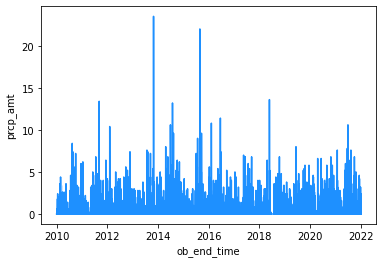

In [119]:
sns.lineplot(x=dfW["ob_end_time"], y=dfW["prcp_amt"],  color='dodgerblue')

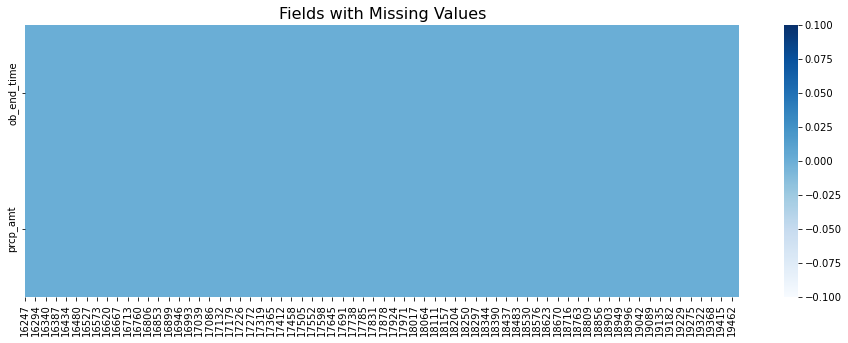

In [120]:
data = dfW.iloc[15000:18000]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(data.isna().transpose(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
plt.show()

In [121]:
dfW['prcp_amt'].isna().sum()


28

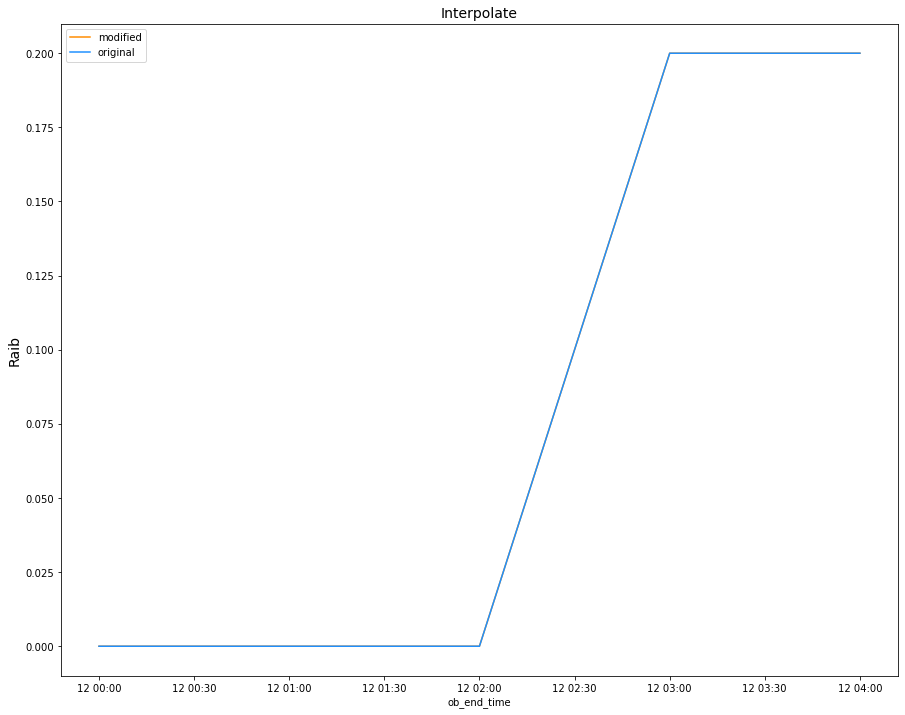

In [122]:
data = dfW.iloc[79900:79905]
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
sns.lineplot(x=data.ob_end_time, y=data.prcp_amt.interpolate(),color='darkorange', label = 'modified')
sns.lineplot(x=data.ob_end_time, y=data.prcp_amt.fillna(np.inf),  color='dodgerblue', label = 'original')
ax.set_title(f'Interpolate', fontsize=14)
ax.set_ylabel(ylabel='Raib', fontsize=14)

plt.show()

In [123]:
print(dfW.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104426 entries, 0 to 113117
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ob_end_time  104426 non-null  datetime64[ns]
 1   prcp_amt     104398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 MB
None


In [124]:
print(dfW[dfW.isnull().any(axis=1)])

              ob_end_time  prcp_amt
16238 2011-09-23 09:00:00       NaN
16239 2011-09-23 10:00:00       NaN
36092 2013-11-07 12:00:00       NaN
38795 2014-02-19 11:00:00       NaN
38796 2014-02-19 12:00:00       NaN
38797 2014-02-19 13:00:00       NaN
45529 2014-11-05 12:00:00       NaN
45530 2014-11-05 13:00:00       NaN
45531 2014-11-05 14:00:00       NaN
50051 2015-04-28 10:00:00       NaN
50052 2015-04-28 11:00:00       NaN
50053 2015-04-28 12:00:00       NaN
50054 2015-04-28 13:00:00       NaN
61203 2016-06-30 10:00:00       NaN
70434 2017-06-21 11:00:00       NaN
70435 2017-06-21 12:00:00       NaN
73372 2017-10-12 11:00:00       NaN
73373 2017-10-12 12:00:00       NaN
74231 2017-11-14 13:00:00       NaN
76464 2018-02-08 13:00:00       NaN
79902 2018-06-29 11:00:00       NaN
79903 2018-06-29 12:00:00       NaN
79904 2018-06-29 13:00:00       NaN
84427 2018-12-20 12:00:00       NaN
84428 2018-12-20 13:00:00       NaN
87506 2019-04-17 22:00:00       NaN
88430 2019-05-24 12:00:00   

In [125]:
print(type(dfW))

<class 'pandas.core.frame.DataFrame'>


In [126]:
dfW['prcp_amt'] = dfW['prcp_amt'].interpolate()

In [148]:
dfW_down = dfW.resample("D", on='ob_end_time').sum()

In [149]:
print(dfW.info())
print(dfW_down.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104426 entries, 0 to 113117
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ob_end_time  104426 non-null  datetime64[ns]
 1   prcp_amt     104426 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prcp_amt  4383 non-null   float64
dtypes: float64(1)
memory usage: 68.5 KB
None
